In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import statsmodels as sm

%matplotlib inline

In [2]:
PV_norm = pd.read_csv("..//solar_data/PV_norm.csv",parse_dates=['date_time'],index_col="date_time")

In [3]:
PV_norm.head()

,mean_dir_horiz,mean_diffuse,zenith_dist,GHI,year,month_day,dt,time_of_day,solar_mins,t,daily_cos,daily_sin,yearly_cos,yearly_sin,half_yearly_cos,half_yearly_sin,pred,pred_Q15,norm,norm_Q15
date_time,,,,,,,,,,,,,,,,,,,,
2003-03-02 00:01:00,0.0,0.0,0.0,0.0,2003,"(3, 2)",2003/03/02 00:01:00,00:01:00,86455.030743,1,0.971310,0.237816,0.512395,0.858750,-0.474903,0.880038,0.0,0.0,NaN,NaN
2003-03-02 00:02:00,0.0,0.0,0.0,0.0,2003,"(3, 2)",2003/03/02 00:02:00,00:02:00,86456.030917,2,0.970263,0.242053,0.512385,0.858756,-0.474924,0.880027,0.0,0.0,NaN,NaN
2003-03-02 00:03:00,0.0,0.0,0.0,0.0,2003,"(3, 2)",2003/03/02 00:03:00,00:03:00,86457.031092,3,0.969198,0.246285,0.512374,0.858762,-0.474945,0.880016,0.0,0.0,NaN,NaN
2003-03-02 00:04:00,0.0,0.0,0.0,0.0,2003,"(3, 2)",2003/03/02 00:04:00,00:04:00,86458.031266,4,0.968113,0.250512,0.512364,0.858768,-0.474966,0.880004,0.0,0.0,NaN,NaN
2003-03-02 00:05:00,0.0,0.0,0.0,0.0,2003,"(3, 2)",2003/03/02 00:05:00,00:05:00,86459.031440,5,0.967011,0.254735,0.512354,0.858774,-0.474987,0.879993,0.0,0.0,NaN,NaN


In [4]:
# 12 hourly transmissivity
PV_norm_12H = PV_norm.norm.resample('12H').mean()
PV_norm_Q15_12H = PV_norm.norm_Q15.resample('12H').mean()

# Daily transmissivity
PV_norm_D = PV_norm.norm.resample('D').mean()
PV_norm_Q15_D = PV_norm.norm_Q15.resample('D').mean()

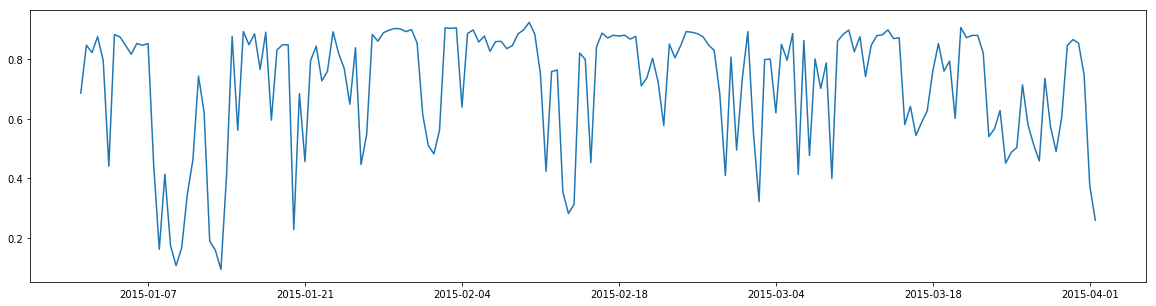

In [5]:
# 12 hourly transmissivity - portion only
plt.figure(figsize=(20,5))
plt.plot(PV_norm_12H['2015-1-1':'2015-4-1']);

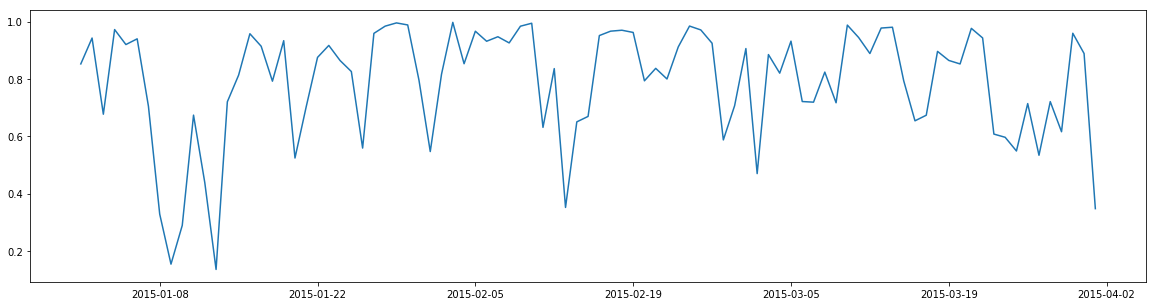

In [6]:
# Daily transmissivity - same portion
plt.figure(figsize=(20,5))
plt.plot(PV_norm['2015-1-1':'2015-4-1'].norm_Q15.resample('D').mean().dropna());

In [7]:
# Check for missing values
PV_norm_Q15_12H.isna().sum()

490

In [8]:
# Drop them
PV_norm_Q15_12H = PV_norm_Q15_12H.dropna().values

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

splits = TimeSeriesSplit(n_splits=3)

for train_index, test_index in splits.split(PV_norm_Q15_12H):
    train = PV_norm_Q15_12H[train_index]
    test = PV_norm_Q15_12H[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training observations: %d' % (len(train)))
    print('Test observations: %d' % (len(test)))

In [ ]:
len(PV_norm_Q15_12H)

### Use a grid search to find the optimal ARMA order

In [80]:
def eval_arima(X, arima_order):
    model = ARIMA(X, list(map(int,arima_order))).fit(disp=0)
    return {'AIC':model.aic,
            'BIC':model.bic,
            'HQIC':model.hqic,
            'log_likelihood':model.llf}

In [81]:
p_values = range(0,8) 
d_values = range(0,1)
q_values = range(0,8)

evals = {}
counter = 0
no_combinations = len(p_values) * len(d_values) * len(q_values)

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = str(p)+str(d)+str(q)
            try:                
                evals[order] = eval_arima(PV_norm_Q15_12H,order)
            except:
                evals[order] = np.nan
            counter += 1
            print(counter,'/',no_combinations,'models evaluated','(',order,')')

1 / 64 models evaluated ( 000 )
2 / 64 models evaluated ( 001 )
3 / 64 models evaluated ( 002 )
4 / 64 models evaluated ( 003 )
5 / 64 models evaluated ( 004 )
6 / 64 models evaluated ( 005 )
7 / 64 models evaluated ( 006 )
8 / 64 models evaluated ( 007 )
9 / 64 models evaluated ( 100 )
10 / 64 models evaluated ( 101 )
11 / 64 models evaluated ( 102 )
12 / 64 models evaluated ( 103 )
13 / 64 models evaluated ( 104 )
14 / 64 models evaluated ( 105 )
15 / 64 models evaluated ( 106 )
16 / 64 models evaluated ( 107 )
17 / 64 models evaluated ( 200 )
18 / 64 models evaluated ( 201 )
19 / 64 models evaluated ( 202 )
20 / 64 models evaluated ( 203 )
21 / 64 models evaluated ( 204 )
22 / 64 models evaluated ( 205 )
23 / 64 models evaluated ( 206 )
24 / 64 models evaluated ( 207 )
25 / 64 models evaluated ( 300 )
26 / 64 models evaluated ( 301 )
27 / 64 models evaluated ( 302 )
28 / 64 models evaluated ( 303 )
29 / 64 models evaluated ( 304 )
30 / 64 models evaluated ( 305 )
31 / 64 models eval

C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\tsa\ts

37 / 64 models evaluated ( 404 )
38 / 64 models evaluated ( 405 )
39 / 64 models evaluated ( 406 )
40 / 64 models evaluated ( 407 )
41 / 64 models evaluated ( 500 )
42 / 64 models evaluated ( 501 )
43 / 64 models evaluated ( 502 )
44 / 64 models evaluated ( 503 )
45 / 64 models evaluated ( 504 )
46 / 64 models evaluated ( 505 )


C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


47 / 64 models evaluated ( 506 )
48 / 64 models evaluated ( 507 )
49 / 64 models evaluated ( 600 )
50 / 64 models evaluated ( 601 )
51 / 64 models evaluated ( 602 )
52 / 64 models evaluated ( 603 )


C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


53 / 64 models evaluated ( 604 )
54 / 64 models evaluated ( 605 )


C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


55 / 64 models evaluated ( 606 )
56 / 64 models evaluated ( 607 )
57 / 64 models evaluated ( 700 )
58 / 64 models evaluated ( 701 )
59 / 64 models evaluated ( 702 )
60 / 64 models evaluated ( 703 )
61 / 64 models evaluated ( 704 )


C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


62 / 64 models evaluated ( 705 )


C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


63 / 64 models evaluated ( 706 )
64 / 64 models evaluated ( 707 )


C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [82]:
output = pd.DataFrame(evals).T

In [83]:
output[output.BIC == output.BIC.min()]

,AIC,BIC,HQIC,log_likelihood
302,-3723.707973,-3672.996133,-3706.571496,1868.853986


In [84]:
output[output.AIC == output.AIC.min()]

,AIC,BIC,HQIC,log_likelihood
605,-3728.776536,-3634.597405,-3696.951652,1877.388268


### Walk forward validation

The model is retrained on a fixed number of the most recent previous observations at each timestep and used to predict the next timestep.

In [85]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [93]:
X = PV_norm_Q15_12H

n_train = len(X) - 100
n_records = len(X)

persistence = [] # Set a baseline
ARIMA_302_pred = []
ARIMA_605_pred = []

actual = []

for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    
    # Persistence model
    persistence.append(train[-1]) 

    # ARMA 302 model
    try:
        ARIMA_302_model_fit = ARIMA(train, order=(3,0,2)).fit(disp=0)
        ARIMA_302_pred.append(ARIMA_302_model_fit.forecast(1)[0][0])
    except:
        ARIMA_302_pred.append(np.nan)
    
    # ARMA 605 model
    try:
        ARIMA_605_model_fit = ARIMA(train, order=(6,0,5)).fit(disp=0)
        ARIMA_605_pred.append(ARIMA_605_model_fit.forecast(1)[0][0])
    except:
        ARIMA_605_pred.append(np.nan)
    
    # Create list of actual observations
    actual.append(test[0])

C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\U

C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\U

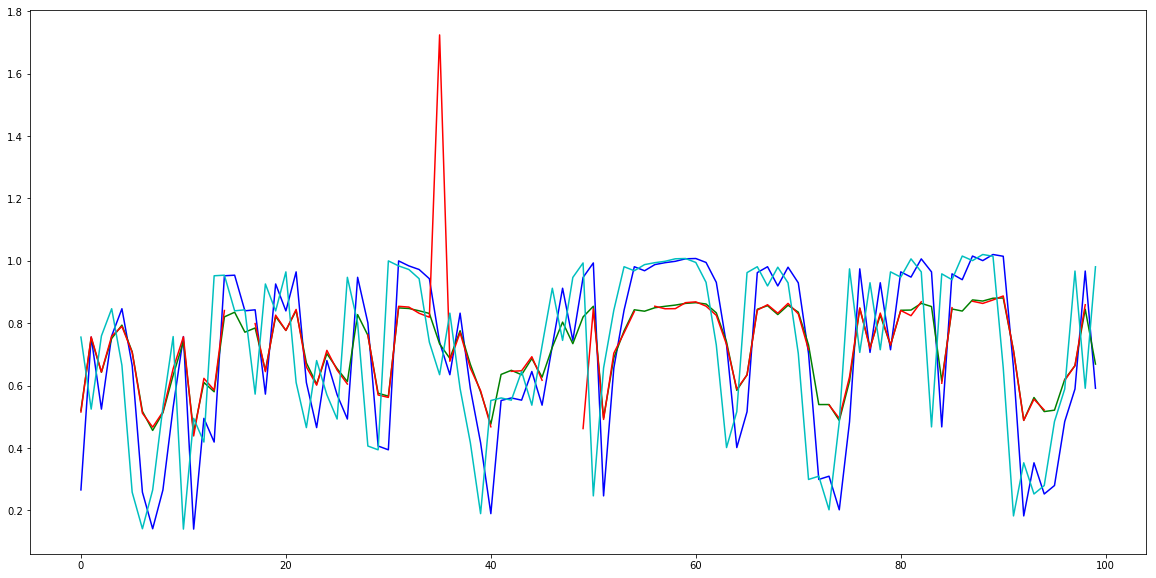

In [112]:
plt.figure(figsize=(20,10))
plt.plot(persistence, 'b-')
plt.plot(ARIMA_302_pred,'g-')
plt.plot(ARIMA_605_pred,'r-')
plt.plot(actual, 'c-');

In [108]:
def MAE(predicted,actual):
    return np.nanmean([np.abs(i-j) for i,j in zip(predicted,actual)])

In [109]:
print ('Persistence model MAE:', MAE(persistence,actual))
print ('ARIMA 302 model MAE:', MAE(ARIMA_302_pred,actual))
print ('ARIMA 605 model MAE:', MAE(ARIMA_605_pred, actual))

Persistence model MAE: 0.1917578615310928
ARIMA 302 model MAE: 0.1866500303606241
ARIMA 605 model MAE: 0.20652610351672135


In [110]:
model = ARIMA(ARIMA_605_pred, order=(3,0,2))
model_fit = model.fit(disp=0)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                10348
Model:                     ARMA(3, 2)   Log Likelihood                1868.854
Method:                       css-mle   S.D. of innovations              0.202
Date:                Fri, 12 Oct 2018   AIC                          -3723.708
Time:                        23:56:53   BIC                          -3672.996
Sample:                             0   HQIC                         -3706.571
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7489      0.008     91.063      0.000       0.733       0.765
ar.L1.y        0.4579      0.010     45.357      0.000       0.438       0.478
ar.L2.y        0.9887      0.003    304.415      0.000       0.982       0.995
ar.L3.y       -0.4566      0.009    -49.135      0.000      -0.475      -0.438
ma.L1.y        0.0108      0.005      2.227      0.026       0.001       0.020
ma.L2.y       -0.9691      0.005   -204.335      0.000      -0.978      -0.960
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0043           +0.0000j            1.0043            0.5000
AR.2            1.0094           +0.0000j            1.0094            0.0000
AR.3            2.1602           +0.0000j            2.1602            0.0000
MA.1           -1.0103           +0.0000j            1.0103            0.5000
MA.2            1.0214           +0.0000j            1.0214            0.0000
-----------------------------------------------------------------------------
"""

In [117]:
# Mean average error for fitted model
MAE(model_fit.fittedvalues,ARIMA_605_pred)

0.15519693669643086